# BRAIN TUMOR DETECTION USING CNN AND SVM
_The Brain Tumor Detection Project is an artificial intelligence project designed to detect the presence of brain tumors in medical images such as MRI scans. This project utilizes deep learning techniques to analyze the images and classify them as either having a tumor or being tumor-free. The model will be compared with SVM_

## Part I

# 1.0 Importing Required Libraries

In [13]:
import cv2
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import shuffle
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

ImportError: cannot import name '_check_response_method' from 'sklearn.utils.validation' (C:\Users\linco\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py)

# 2.0 Loading The Dataset
_The data for this project is available at [kaggle](https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection). The dataset contains 3 folders, _Yes, No and Pred_ which contains 3060 Brain MRI Images._

In [ ]:
# Set the directory where the images are located
image_directory = 'Dataset/'

# Get the list of images without tumor
no_tumor_images = os.listdir(image_directory + 'no/')

# Get the list of images with tumor
yes_tumor_images = os.listdir(image_directory + 'yes/')

# Print the list of images without tumor
#print(no_tumor_images)

2.1 Data Visualization: No Tumor

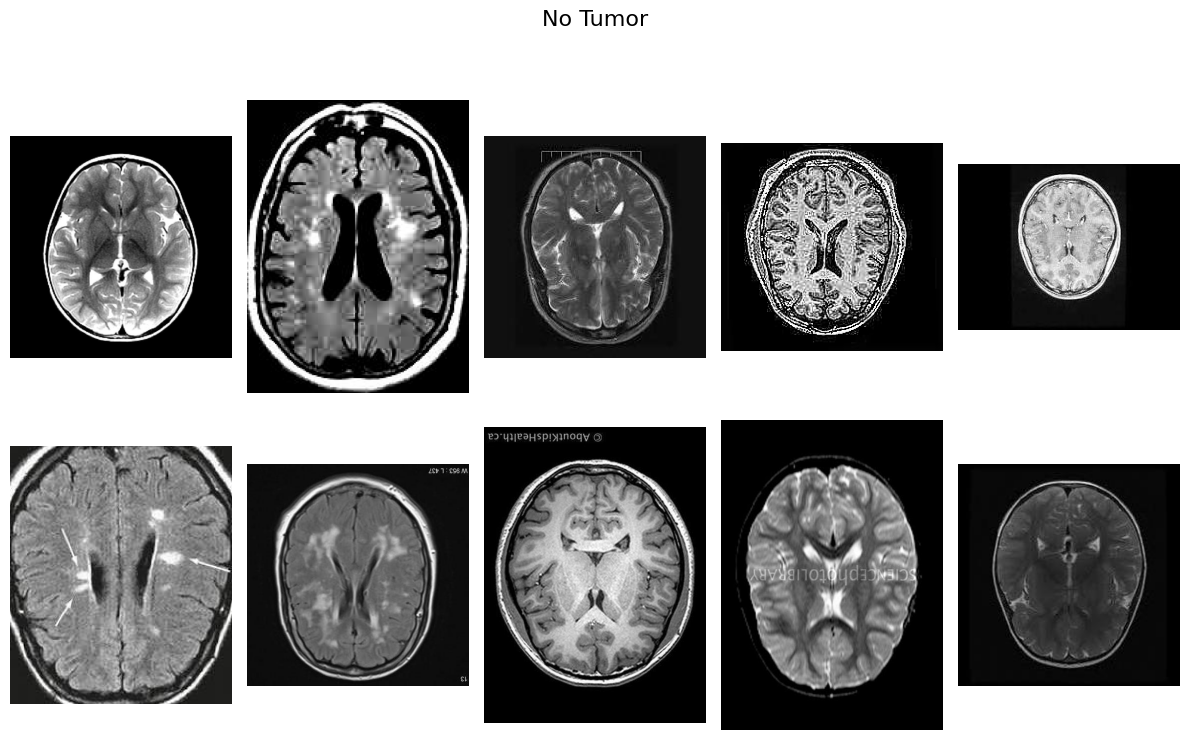

In [ ]:
# Get the list of images without tumors
no_tumor_images = os.listdir(image_directory + 'no/')

# Display 10 images in a grid
num_images_to_display = 10
rows = int(np.ceil(num_images_to_display / 5))
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    if i < num_images_to_display:
        img = mpimg.imread(image_directory + 'no/' + no_tumor_images[i])
        ax.imshow(img)
        ax.axis('off')

fig.suptitle('No Tumor', fontsize=16)
plt.tight_layout()
plt.show()


2.2 Data Visualization: Tumor

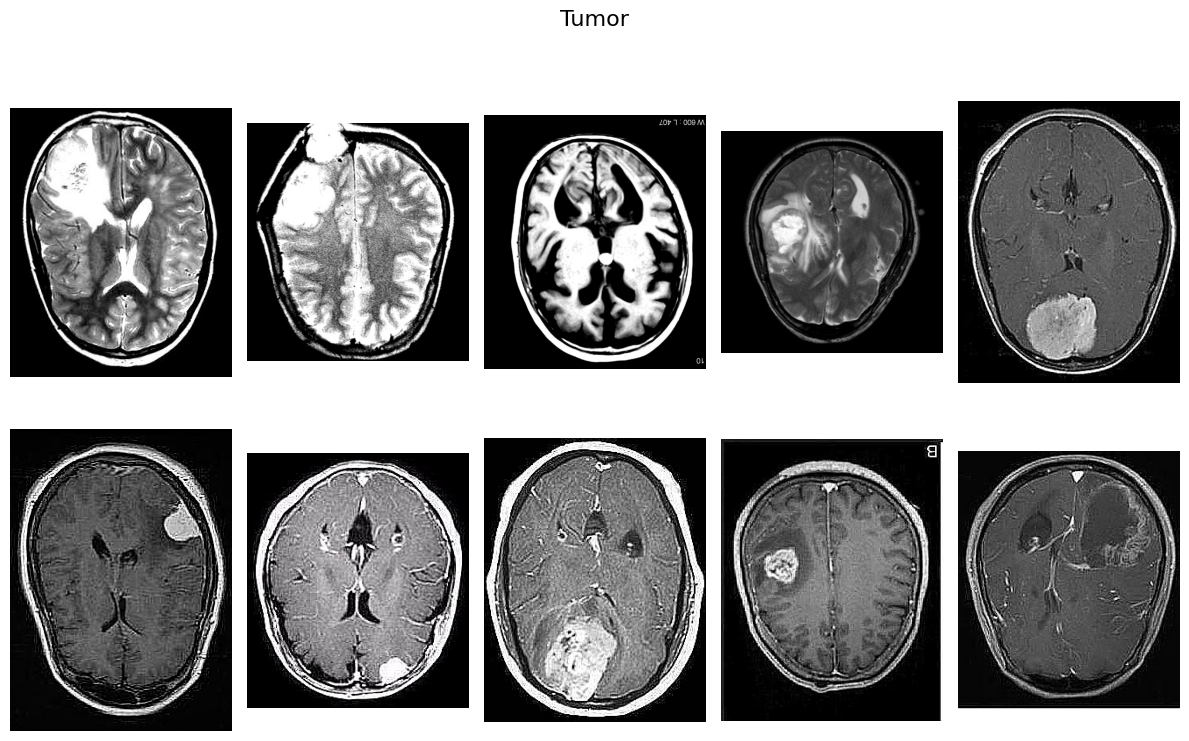

In [ ]:
# Get the list of images without tumors
yes_tumor_images = os.listdir(image_directory + 'yes/')

# Display 10 images in a grid
num_images_to_display = 10
rows = int(np.ceil(num_images_to_display / 5))
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    if i < num_images_to_display:
        img = mpimg.imread(image_directory + 'yes/' + yes_tumor_images[i])
        ax.imshow(img)
        ax.axis('off')

fig.suptitle('Tumor', fontsize=16)
plt.tight_layout()
plt.show()

_As can be seen above, the images are of different sizes. The next step is data preprocessing and I am going to resize the images to a uniform size for all of them._

# 3.0 Data Preprocessing

In [ ]:
input_size = 64
dataset_x = []
label_y = []

# Process images without tumors
for i, image_name in enumerate(no_tumor_images):
    # Check if image is in jpg format
    if image_name.split('.')[1] == 'jpg':
        # Read image from directory
        image = cv2.imread(image_directory + 'no/' + image_name)
        # Convert image to RGB format
        image = Image.fromarray(image, 'RGB')
        # Resize image to specified input size
        image = image.resize((input_size, input_size))
        # Convert image to numpy array
        dataset_x.append(np.array(image))
        # Append label for no tumor
        label_y.append(0)

# Process images with tumors
for i, image_name in enumerate(yes_tumor_images):
    # Check if image is in jpg format
    if image_name.split('.')[1] == 'jpg':
        # Read image from directory
        image = cv2.imread(image_directory + 'yes/' + image_name)
        # Convert image to RGB format
        image = Image.fromarray(image, 'RGB')
        # Resize image to specified input size
        image = image.resize((input_size, input_size))
        # Convert image to numpy array
        dataset_x.append(np.array(image))
        # Append label for tumor
        label_y.append(1)

3.1 Converting the data set to a numppy array.

In [ ]:
# Convert dataset_x to a numpy array
dataset_x = np.array(dataset_x)

# Convert label_y to a numpy array
label_y = np.array(label_y)

3.2 Shuffle the dataset

_Now, I am going to shuffle dataset_x, and y_label, because the data is ordered (meaning the arrays contains the first part belonging to one class and the second part belonging to the other class, and we don't want that)._

In [ ]:
# shuffling dataset
dataset_x, label_y = shuffle(dataset_x, label_y)

3.3 Splitting Data
_Here, I am going to split the data into training and testing set_
* 80% for training
* 20% for testing

In [ ]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(dataset_x, label_y, test_size=0.2, random_state=0)

# Normalize the training set
x_train = normalize(x_train, axis=1)

# Normalize the testing set
x_test = normalize(x_test, axis=1)


# 4.0 BUILDING THE MODELS

 4.1 BUILDING THE CNN MODEL

In [ ]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout

# Create a sequential model
model_CNN = Sequential()

# Add a convolutional layer with 32 filters, kernel size (3,3), and input shape (input_size, input_size, 3)
model_CNN.add(Conv2D(32, (3,3), input_shape =(input_size, input_size,3)))
model_CNN.add(Activation('relu'))
model_CNN.add(MaxPooling2D(pool_size=(2,2)))

# Add another convolutional layer with 32 filters, kernel size (3,3), and 'he_uniform' kernel initializer
model_CNN.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model_CNN.add(Activation('relu'))
model_CNN.add(MaxPooling2D(pool_size=(2,2)))

# Add another convolutional layer with 64 filters, kernel size (3,3), and 'he_uniform' kernel initializer
model_CNN.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model_CNN.add(Activation('relu'))
model_CNN.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the previous layer
model_CNN.add(Flatten())

# Add a fully connected layer with 64 units
model_CNN.add(Dense(64))
model_CNN.add(Activation('relu'))

# Add a dropout layer with dropout rate of 0.5
model_CNN.add(Dropout(0.5))

# Add the output layer with 1 unit and sigmoid activation function
model_CNN.add(Dense(1))
model_CNN.add(Activation('sigmoid'))

4.2 Compiling THE CNN MODEL

In [ ]:
import time

# Start the timer
start_time = time.time()

# Compiling the model
model_CNN.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer='adam', 
    metrics=['accuracy']
)

# Training the model
model_CNN.fit(
    x_train, 
    y_train, 
    batch_size=16,
    verbose=1, 
    epochs=10, 
    validation_data=(x_test, y_test),
    shuffle=False
)

# End the timer
end_time = time.time()

# Calculate the training time
training_time_CNN = end_time - start_time


# Saving the model
model_CNN.save('Brain_Tumor_Detection_1.0.h5')
tf.saved_model.save(model_CNN, 'C:\BRA FAMOUS\PROGRAMMING\PYTHON\PYTHON PROJECTS\Brain Tumour Detection\BTD Dataset')

Epoch 1/10
150/150 [==============================] - 7s 38ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.1162 - val_accuracy: 0.9817
Epoch 2/10
150/150 [==============================] - 6s 38ms/step - loss: 0.0090 - accuracy: 0.9962 - val_loss: 0.1205 - val_accuracy: 0.9683
Epoch 3/10
150/150 [==============================] - 6s 37ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.1105 - val_accuracy: 0.9833
Epoch 4/10
150/150 [==============================] - 5s 35ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0754 - val_accuracy: 0.9850
Epoch 5/10
150/150 [==============================] - 6s 37ms/step - loss: 0.0138 - accuracy: 0.9967 - val_loss: 0.0918 - val_accuracy: 0.9850
Epoch 6/10
150/150 [==============================] - 6s 39ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0900 - val_accuracy: 0.9833
Epoch 7/10
150/150 [==============================] - 5s 35ms/step - loss: 4.5347e-04 - accuracy: 1.0000 - val_loss: 0.1005 - val_accuracy: 0.

INFO:tensorflow:Assets written to: C:\BRA FAMOUS\PROGRAMMING\PYTHON\PYTHON PROJECTS\Brain Tumour Detection\BTD Dataset\assets


INFO:tensorflow:Assets written to: C:\BRA FAMOUS\PROGRAMMING\PYTHON\PYTHON PROJECTS\Brain Tumour Detection\BTD Dataset\assets


4.3 MODEL SUMMARY

In [ ]:
print(model_CNN.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 activation_40 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 activation_41 (Activation)  (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                 

4.4 Training the Dataset on SVM (Support Vector Machine)

_Before I proceed, I need to  process the traing data to a 2D_

In [ ]:
# Reshape x_train to 2D array
x_train_svm = x_train.reshape(x_train.shape[0], -1)
x_test_svm = x_test.reshape(x_test.shape[0], -1)

In [ ]:
import time
from sklearn.svm import SVC

# Start the timer
start_time_SVM = time.time()

# Create the SVC model
model_SVM = SVC(C=1.0, kernel='rbf', gamma='scale')

# Fit the model on the training data
model_SVM.fit(x_train_svm, y_train)

# End the timer
end_time_SVM = time.time()

# Calculate the training time
training_time_SVM = end_time_SVM - start_time_SVM


Training time for SVM Model:  449.3358495235443  seconds


# 5.0 Model Evaluation

5.1 Area Under the Curve

19/19 [==============================] - 0s 15ms/step


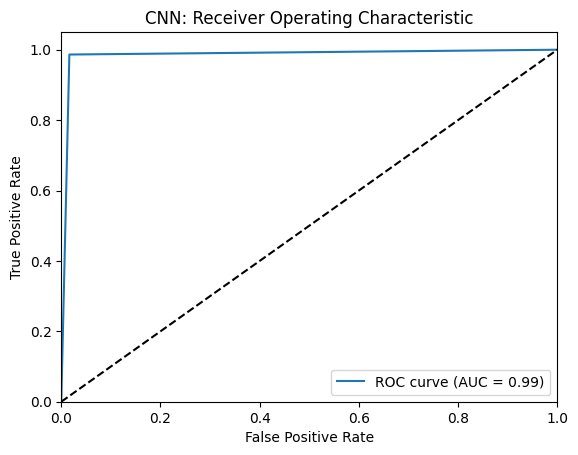

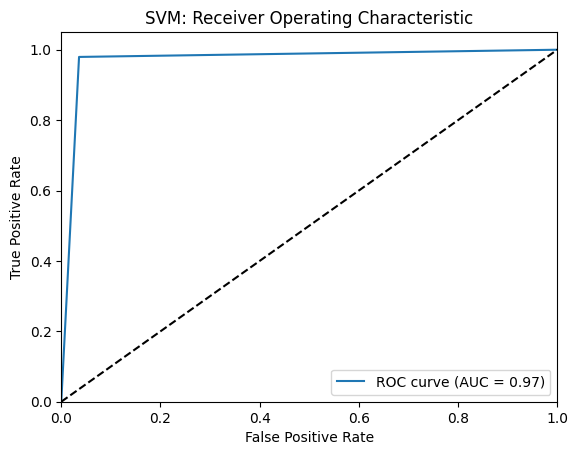

In [ ]:
# Make predictions on the test set
y_pred_CNN = model_CNN.predict(x_test)
y_pred_SVM = model_SVM.predict(x_test_svm)

# Define a threshold value
threshold = 0.5

# Apply thresholding to the predictions: CNN
y_pred_CNN = np.where(y_pred_CNN >= threshold, 1, 0)
y_pred_CNN=np.array(y_pred_CNN)


# Apply thresholding to the predictions: SVM
y_pred_SVM = np.where(y_pred_SVM >= threshold, 1, 0)
y_pred_SVM=np.array(y_pred_SVM)

# CNN: Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr_CNN, tpr_CNN, thresholds = roc_curve(y_test, y_pred_CNN)

# SVM: Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr_SVM, tpr_SVM, thresh = roc_curve(y_test, y_pred_SVM)

# CNN: Compute the Area Under the Curve (AUC)
auc_score_CNN = auc(fpr_CNN, tpr_CNN)

# SVM: Compute the Area Under the Curve (AUC)
auc_score_SVM = auc(fpr_SVM, tpr_SVM)

# CNN:   Plot the ROC curve
plt.plot(fpr_CNN, tpr_CNN, label='ROC curve (AUC = %0.2f)' % auc_score_CNN)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN: Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# SVM: Plot the ROC curve
plt.plot(fpr_SVM, tpr_SVM, label='ROC curve (AUC = %0.2f)' % auc_score_SVM)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM: Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

* _As seen above,the CNN model achieved an AUC of 0.99, indicating excellent performance in distinguishing between positive and negative cases in brain tumor detection. On the other hand, the SVM model achieved an AUC of 0.97, which is slightly lower but still indicates a strong discriminatory ability._

* _Considering the AUC values alone, the CNN model appears to perform marginally better than the SVM model._

5.2 Model Training Time

In [ ]:
print("Training time for CNN Model: ", training_time_CNN, " seconds")
print("Training time for SVM Model: ", training_time_SVM, " seconds")

Training time for CNN Model:  55.00800538063049  seconds
Training time for SVM Model:  449.3358495235443  seconds


_The CNN model outperformed the SVM model in terms of training time, taking approximately 55 seconds compared to the SVM model's 449 seconds. This can be attributed to the CNN's specialized architecture for image analysis tasks like brain tumor detection, while the SVM's optimization process and support vector complexity contributed to its longer training time. The CNN's faster training time offers advantages for dealing with large datasets and situations where quick model training is desired. Overall, the CNN model demonstrated a notable advantage over the SVM model in terms of training efficiency._

5.3 Confusion Matrix

In [ ]:
# Compute the confusion matrix for CNN model
cm_CNN = confusion_matrix(y_test, y_pred_CNN)

# Define the class labels (if known)
class_labels = ['Tumor ','No Tumor']  # Replace with your class labels

# Plot the confusion matrix
plt.imshow(cm_CNN, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('CNN: Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell
threshi = cm_CNN.max() / 2.0
for i in range(cm_CNN.shape[0]):
    for j in range(cm_CNN.shape[1]):
        plt.text(j, i, format(cm_CNN[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > threshi else "black")
plt.show()


# Compute the confusion matrix for SVM model
cm_SVM = confusion_matrix(y_test, y_pred_SVM)

# Define the class labels (if known)
class_labels = ['Tumor ','No Tumor']  # Replace with your class labels

# Plot the confusion matrix
plt.imshow(cm_SVM, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('SVM: Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell
threshi_SVM = cm_SVM.max() / 2.0
for i in range(cm_SVM.shape[0]):
    for j in range(cm_SVM.shape[1]):
        plt.text(j, i, format(cm_SVM[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > threshi_SVM else "black")
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, class_labels):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add text annotations for each cell
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.show()

# Compute the confusion matrix for CNN model
cm_CNN = confusion_matrix(y_test, y_pred_CNN)

# Define the class labels (if known)
class_labels = ['Tumor', 'No Tumor']  # Replace with your class labels

# Plot the confusion matrix for CNN model
plot_confusion_matrix(cm_CNN, class_labels)

# Compute the confusion matrix for SVM model
cm_SVM = confusion_matrix(y_test, y_pred_SVM)

# Plot the confusion matrix for SVM model
plot_confusion_matrix(cm_SVM, class_labels)